Superstore - Data Science Project - Jalal Assaly
-----------------------------------------------------
Use Case: an international wholesale Superstore collected data about its sales for 4 years. It is required that we extract valuable information from the given dataset.<br> 
Also, try and define which products are the most successful and which shall be terminated.

-------------------------------------------------------------------------------------------------------------
__Data dictionary__:

| Field | Description |
| --- | --- |
| Row ID | Unique row ID |
| Order ID	| Unique identifier of each order |
| OrderDate	| Date of order |
| Ship Date	| Date that product was shipped |
| Ship Mode	| Shipping types (for e.g., Second Class, Standard Class, First Class, Same Day) |
| Customer ID | Unique identifier of customer |
| Customer Name	| Name of customer |
| Segment | Customer segment (for e.g., Consumer, Corporate, Home Office) |
| Country | Country where customer ordered from |
| City | City where customer is from |
| State | State where customer is from |
| Market | Aggregation of regions |
| Region | Region where customer is from |
| Product ID | Unique identifier of each product |
| Category | Overall catergory that product fits into (for e.g., Furniture, Office Supplies, Technology) |
| Sub-Category | Sub-categories of categories (for e.g., Bookcases, Chairs, Labels) |
| Product Name | Name of product |
| Sales | Gross sales per order |
| Quantity | Number of pieces sold in order |
| Discount | Price discount on ordered item |
| Profit | Total profit on order |
| Shipping Cost | Delivery cost paid by the Superstore |
| Order Priority | Emergency factor of order |

--------------------------------------------------------------------------------------------------------------

#### 1) Import Libraries & Read CSV

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [78]:
# 1. Read CSV file and display head
retail_df = pd.read_csv('Global SuperStore.csv') 
retail_df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,6/28/2013,7/1/2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,11/7/2011,11/9/2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,4/14/2012,4/18/2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,10/14/2014,10/21/2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,1/28/2012,1/31/2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


#### 2) Dataset Info

In [79]:
# 2. Get info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [80]:
# 3. Get column names
retail_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [81]:
# 4. Get dataframe shape
retail_df.shape

(51290, 24)

#### 3) Describe Dataframe

In [82]:
# 5. Get sales description
retail_df.describe()
# N.B: only two columns are numeric and the only relevant column to describe is the Sales column

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [83]:
# 6. Are there null values ?
retail_df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [84]:
# 7. Drop Postal Code column because 80% is null and the rest is filled
retail_df.dropna(axis=1, inplace=True)

# Check again
retail_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

#### 4) Exploratory Data Analysis (EDA)

In [85]:
# Before answering any question, the order and ship dates need to be split into day, month and year
# attributes to facilitate analysis

from datetime import datetime as dt

# Extract day, month and year from both Order Date and Ship Date columns
# Order
order_days = []
order_months = []
order_years = []
# Ship
ship_days = []
ship_months = []
ship_years = []

for i in retail_df.index:
    # Order
    order_days.append(dt.strptime(retail_df.loc[i, 'Order Date'], '%m/%d/%Y').day)
    order_months.append(dt.strptime(retail_df.loc[i, 'Order Date'], '%m/%d/%Y').month)
    order_years.append(dt.strptime(retail_df.loc[i, 'Order Date'], '%m/%d/%Y').year)
    # Ship
    ship_days.append(dt.strptime(retail_df.loc[i, 'Ship Date'], '%m/%d/%Y').day)
    ship_months.append(dt.strptime(retail_df.loc[i, 'Ship Date'], '%m/%d/%Y').month)
    ship_years.append(dt.strptime(retail_df.loc[i, 'Ship Date'], '%m/%d/%Y').year)

# Drop Order and Ship dates from dataframe
retail_df.drop('Order Date', axis=1, inplace=True)
retail_df.drop('Ship Date', axis=1, inplace=True)

# Insert new columns
# Order
retail_df.insert(2, column='Order Day', value=order_days)
retail_df.insert(3, column='Order Month', value=order_months)
retail_df.insert(4, column='Order Year', value=order_years)
# Ship
retail_df.insert(5, column='Ship Day', value=ship_days)
retail_df.insert(6, column='Ship Month', value=ship_months)
retail_df.insert(7, column='Ship Year', value=ship_years)

# Check
retail_df.head()

,Row ID,Order ID,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year,Ship Mode,Customer ID,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31,7,2012,31,7,2012,Same Day,RH-19495,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,5,2,2013,7,2,2013,Second Class,JR-16210,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17,10,2013,18,10,2013,First Class,CR-12730,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28,1,2013,30,1,2013,First Class,KM-16375,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,5,11,2013,6,11,2013,Same Day,RH-9495,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [86]:
# Question 1. Which day had the largest number of orders ?
max_date_d = retail_df.groupby(['Order Day', 'Order Month', 'Order Year'])['Order Day'].count().idxmax()
max_order_d = retail_df.groupby(['Order Day', 'Order Month', 'Order Year'])['Order Day'].count().max()

print('Date:', str(max_date_d[0]) + '/' + str(max_date_d[1]) + '/' + str(max_date_d[2]))
print('Number of orders:', max_order_d)

Date: 18/6/2014
Number of orders: 135


In [87]:
# Question 2. Which month brought up the highest number of sales ?
max_date_m = retail_df.groupby(['Order Month', 'Order Year'])['Order Month'].count().idxmax()
max_order_m = retail_df.groupby(['Order Month', 'Order Year'])['Order Month'].count().max()

print('Date:', str(max_date_m[0]) + '/' + str(max_date_m[1]))
print('Number of orders:', max_order_m)

Date: 12/2014
Number of orders: 2153


In [88]:
# Question 3. Who are the 10 biggest customer (in terms of sales)?
biggest_customers = retail_df['Customer Name'].value_counts()[0:10].sort_index().index.tolist()
biggest_customers

['Art Ferguson',
 'Bart Watters',
 'Bill Eplett',
 'Brosina Hoffman',
 'Eric Murdock',
 'Gary Hwang',
 'Harry Greene',
 'Muhammed Yedwab',
 "Patrick O'Brill",
 'Steven Ward']

In [89]:
# Question 4. How many times did they order ?
retail_df['Customer Name'].value_counts()[0:10]

Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
Harry Greene       101
Eric Murdock       100
Art Ferguson        98
Brosina Hoffman     97
Bart Watters        96
Name: Customer Name, dtype: int64

In [90]:
# Question 5. Show the top 5 countries that created the highest sales. 
retail_df.groupby('Country')['Sales'].sum().sort_values(ascending=False)[0:5]

Country
United States    2.297201e+06
Australia        9.252359e+05
France           8.589311e+05
China            7.005620e+05
Germany          6.288400e+05
Name: Sales, dtype: float64

In [91]:
# Question 6. Which category brought in the highest and least amount sales ?
retail_df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         4.744557e+06
Furniture          4.110874e+06
Office Supplies    3.787070e+06
Name: Sales, dtype: float64

In [92]:
# Question 7. List the top 20 products that brought in the highest profits
retail_df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)[0:20]

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.92800
Cisco Smart Phone, Full Size                                                   17238.52060
Motorola Smart Phone, Full Size                                                17027.11300
Hoover Stove, Red                                                              11807.96900
Sauder Classic Bookcase, Traditional                                           10672.07300
Harbour Creations Executive Leather Armchair, Adjustable                       10427.32600
Nokia Smart Phone, Full Size                                                    9938.19550
Cisco Smart Phone, with Caller ID                                               9786.64080
Nokia Smart Phone, with Caller ID                                               9465.32570
Belkin Router, USB                                                              8955.01800
Hewlett Wireless Fax, High-Speed                                             

In [93]:
# Question 8. List the top 20 products that brought in the least profits
retail_df.groupby('Product Name')['Profit'].sum().sort_values(ascending=True)[0:20]

Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Motorola Smart Phone, Cordless                             -4447.0380
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Bevis Round Table, Adjustable Height                       -3649.8940
Bevis Computer Table, Fully Assembled                      -3509.5638
Rogers Lockers, Blue                                       -2893.4908
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bevis Wood Table, with Bottom Storage                      -2782.5880
Lesro Training Table, Rectangular                          -2581.2834
Barricks Conference Table, Rectangular                     -2487.9675
Bevis Conference Table, Fully Assembled                    -2443.0893
Lesro Round Table, Adjustable Height                       -2402.9760
Lesro Computer Table, Fully Assembled                      -2322.8380
Eldon L

In [94]:
# Question 9. Which products were listed at a discount superior to 0.5% ?
retail_df[retail_df['Discount'] > 0.5]['Product Name'].value_counts()

Smead Lockers, Single Width                                                   11
Rogers File Cart, Single Width                                                11
Stockwell Thumb Tacks, Metal                                                   9
Avery Index Tab, Clear                                                         9
Acco Index Tab, Clear                                                          9
                                                                              ..
Hamilton Beach Toaster, Silver                                                 1
Hoover Commercial Soft Guard Upright Vacuum And Disposable Filtration Bags     1
Ricoh - Ink Collector Unit for GX3000 Series Printers                          1
StarTech Inkjet, White                                                         1
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum     1
Name: Product Name, Length: 1861, dtype: int64

In [95]:
# Question 10. How many people ordered the Motorola Smart Phone, Cordless ?
retail_df[retail_df['Product Name'] == 'Motorola Smart Phone, Cordless']['Customer ID'].nunique()

22

In [96]:
# Question 11. How many customers ordered from Argentina ?
retail_df[retail_df['Country'] == 'Argentina']['Customer ID'].nunique()

169

In [97]:
# Question 12. Which item was required to be delivered the same day the most ?
retail_df.groupby('Ship Mode')['Product Name'].value_counts()['Same Day'].idxmax()

'Staples'

<AxesSubplot: xlabel='Order Year,Order Month'>

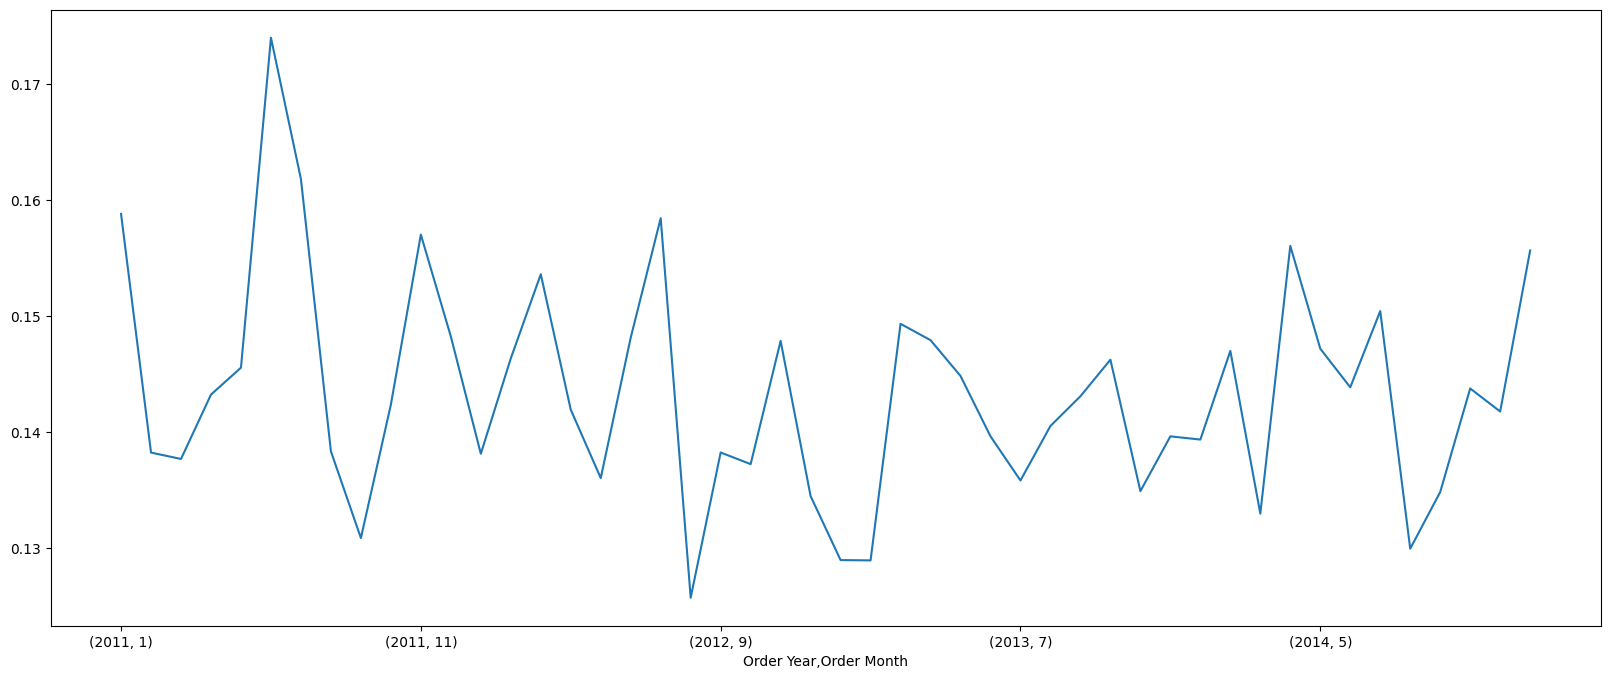

In [98]:
# Question 13. When were the discounts the highest ?
fig = plt.figure()
fig.set_size_inches(20, 8)
retail_df.groupby(['Order Year', 'Order Month'])['Discount'].mean().plot(kind='line')

# It is very interesting to notice that discounts were higher at the beginning of operations, in 2011

<AxesSubplot: xlabel='Sub-Category'>

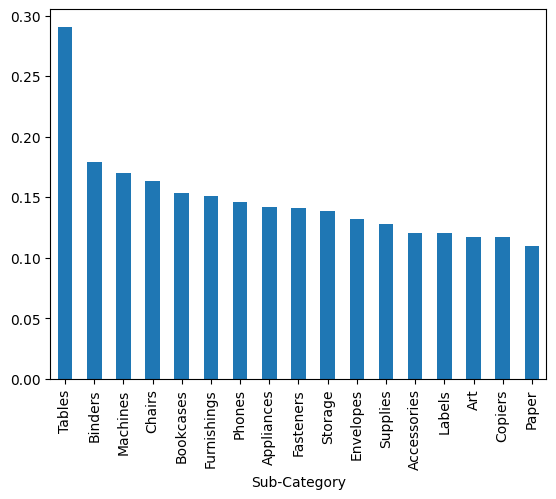

In [99]:
# Question 14. On which sub-category of product are the discounts the highest ?
retail_df.groupby(['Sub-Category'])['Discount'].mean().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot: >

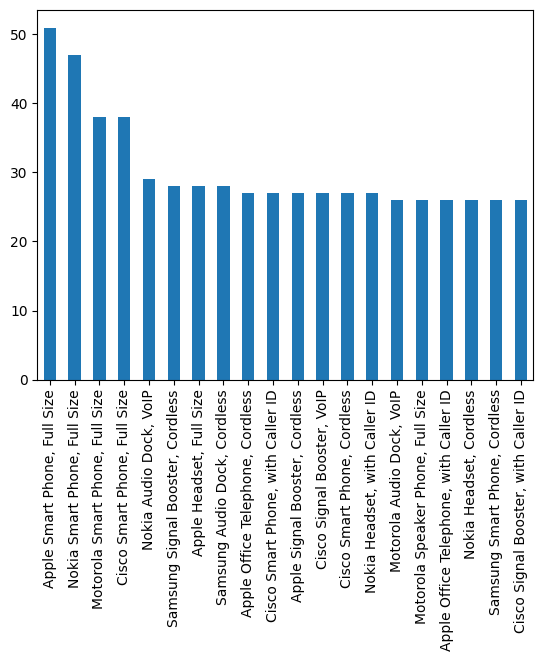

In [100]:
# Question 15. Compare the top 20 sales of all phones.
retail_df[retail_df['Sub-Category'] == 'Phones']['Product Name'].value_counts()[0:20].plot(kind='bar')

<AxesSubplot: ylabel='Region'>

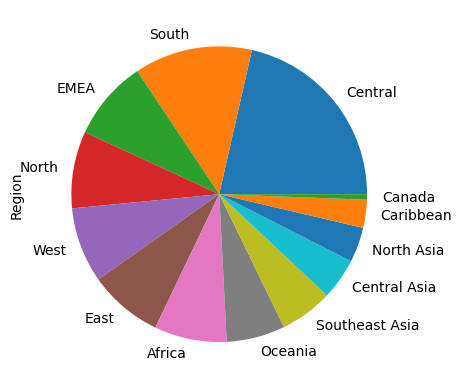

In [101]:
# Question 16. How many phones are bought by every region ?
retail_df[retail_df['Sub-Category'] == 'Phones']['Region'].value_counts().plot(kind='pie')

<AxesSubplot: xlabel='Ship Month'>

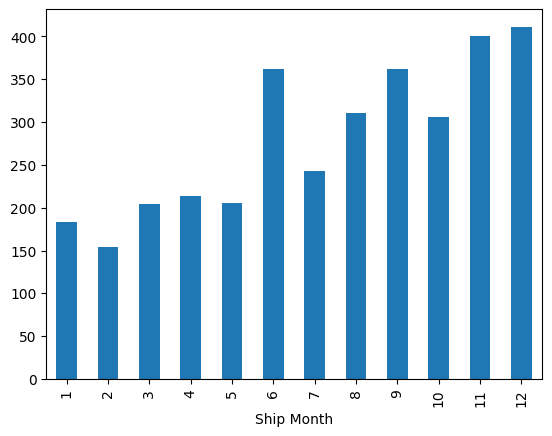

In [102]:
# Question 17. When do people like to offer phones ?
retail_df[retail_df['Sub-Category'] == 'Phones'].groupby('Ship Month')['Ship Month'].count().plot(kind='bar')

# N.B: Interesting to notice taht orders are passed mostly during the holiday season and summer breaks

Sub-Category
Binders        466
Storage        397
Art            363
Paper          292
Phones         253
Chairs         241
Accessories    236
Furnishings    217
Labels         202
Bookcases      199
Envelopes      199
Fasteners      182
Supplies       181
Copiers        169
Appliances     164
Machines       106
Tables          65
Name: Sub-Category, dtype: int64


<AxesSubplot: xlabel='Order Priority', ylabel='count'>

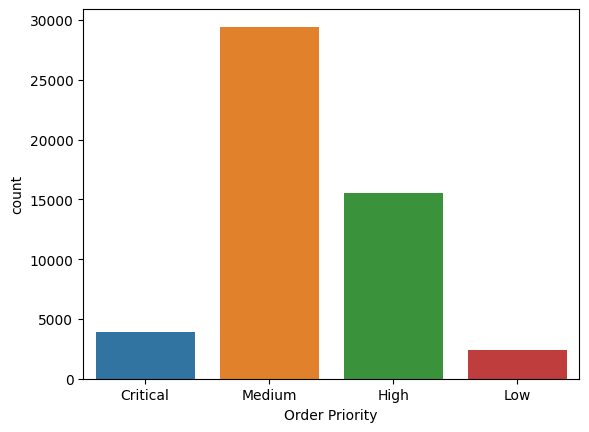

In [103]:
# Question 18. Which products are ordered with the highest priority ?
print(retail_df.groupby('Order Priority')['Sub-Category'].value_counts()['Critical'])

sn.countplot(x='Order Priority', data=retail_df)

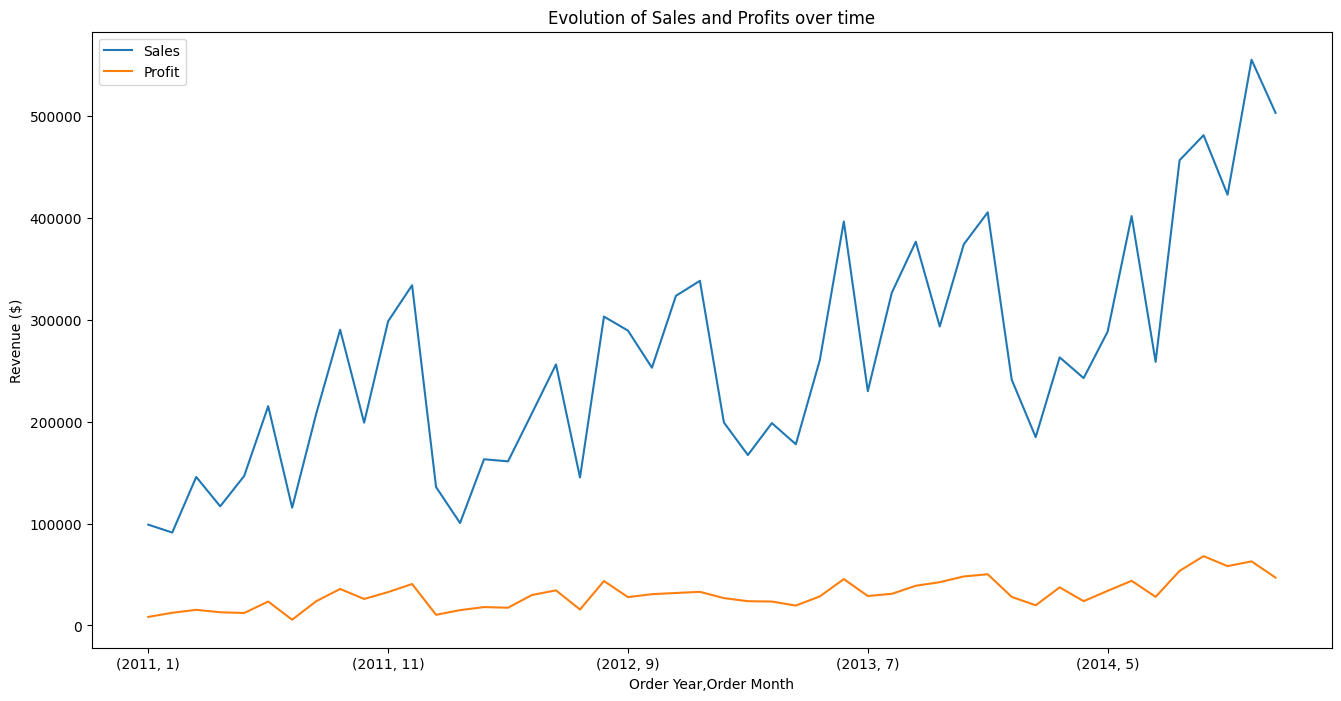

In [104]:
# Question 19. How did sales and profits evolve over time ?
fig = plt.figure()
fig.set_size_inches(16, 8)
plt.title('Evolution of Sales and Profits over time')
plt.ylabel('Revenue ($)')
retail_df.groupby(['Order Year', 'Order Month'])['Sales'].sum().plot(kind='line')
retail_df.groupby(['Order Year', 'Order Month'])['Profit'].sum().plot(kind='line')
plt.legend(loc='upper left')
plt.show()

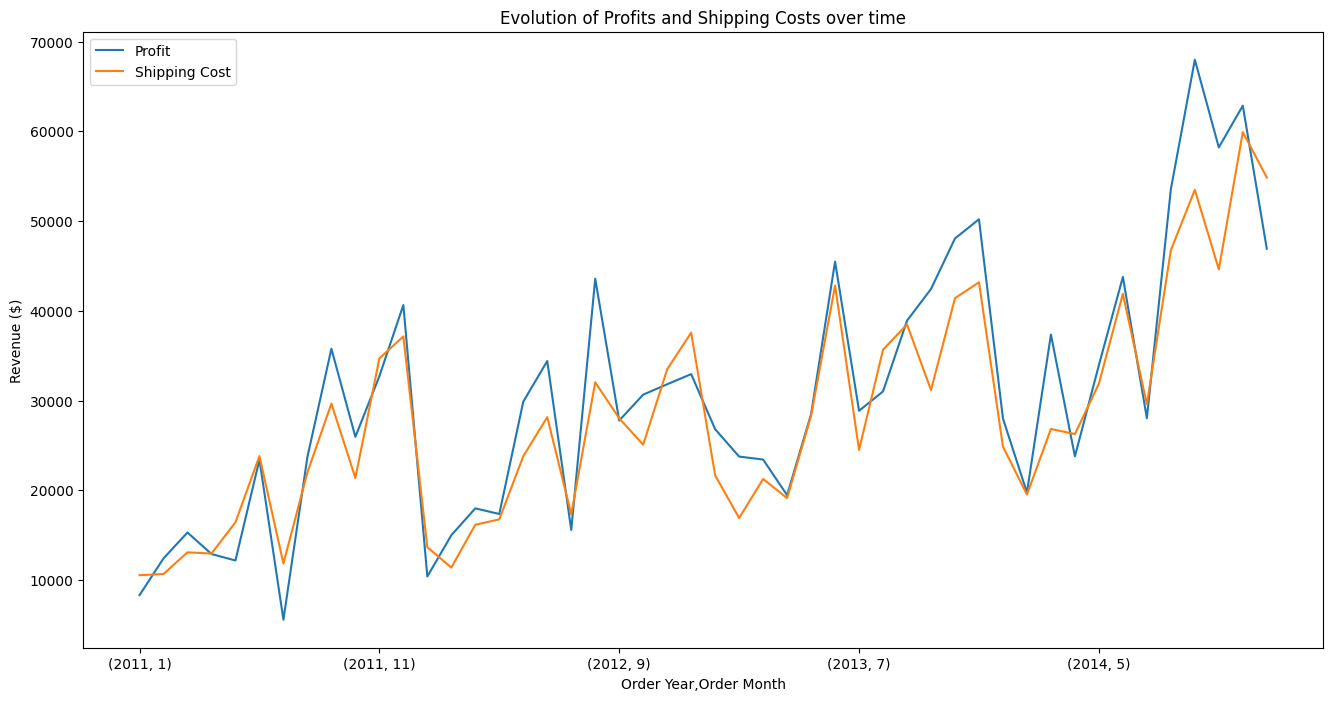

In [105]:
# Question 20. Compare profits and shipping costs over time ?
fig = plt.figure()
fig.set_size_inches(16, 8)
plt.title('Evolution of Profits and Shipping Costs over time')
plt.ylabel('Revenue ($)')
retail_df.groupby(['Order Year', 'Order Month'])['Profit'].sum().plot(kind='line')
retail_df.groupby(['Order Year', 'Order Month'])['Shipping Cost'].sum().plot(kind='line')
plt.legend(loc='upper left')
plt.show()

#### 5) Clustering Model Training

In [106]:
# First, we need to normalize the data and remove unnecessary data
retail_df_copy = retail_df[['Quantity', 'Sales', 'Profit', 'Discount', 'Shipping Cost']]

retail_df_copy.head()

,Quantity,Sales,Profit,Discount,Shipping Cost
0,7,2309.650,762.1845,0.0,933.57
1,9,3709.395,-288.7650,0.1,923.63
2,9,5175.171,919.9710,0.1,915.49
3,5,2892.510,-96.5400,0.1,910.16
4,8,2832.960,311.5200,0.0,903.04


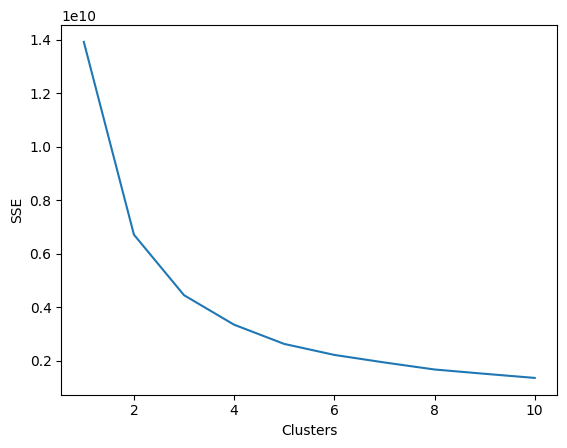

In [107]:
from sklearn.cluster import KMeans

retail_values = retail_df_copy.values

wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(retail_values)
    wcss.append(k_means.inertia_)

#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [108]:
# Optimal number of clusters is 3
k_means_optimum = KMeans(n_clusters = 3, init = 'k-means++',  random_state=42)
clusters = k_means_optimum.fit_predict(retail_values)
print(clusters)

[2 2 2 ... 0 0 0]


In [109]:
# Add cluster attribute to original and copy of the data
retail_df['Cluster'] = clusters
retail_df_copy['Cluster'] = clusters

C:\Users\Jalal\AppData\Local\Temp\ipykernel_30056\3021735184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_df_copy['Cluster'] = clusters


In [110]:
# Show the cluster column at the end
retail_df.head()

,Row ID,Order ID,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year,Ship Mode,Customer ID,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Cluster
0,32298,CA-2012-124891,31,7,2012,31,7,2012,Same Day,RH-19495,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2
1,26341,IN-2013-77878,5,2,2013,7,2,2013,Second Class,JR-16210,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2
2,25330,IN-2013-71249,17,10,2013,18,10,2013,First Class,CR-12730,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2
3,13524,ES-2013-1579342,28,1,2013,30,1,2013,First Class,KM-16375,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2
4,47221,SG-2013-4320,5,11,2013,6,11,2013,Same Day,RH-9495,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2


In [115]:
# Show how each feature impacted the cluster choice
retail_df.groupby('Cluster')[['Quantity', 'Sales', 'Profit', 'Discount', 'Shipping Cost']].mean()

,Quantity,Sales,Profit,Discount,Shipping Cost
Cluster,,,,,
0,3.258785,118.759876,8.651751,0.149112,12.885735
1,4.924146,986.187898,124.484304,0.098600,107.886202
2,6.890995,3169.922959,651.281778,0.071397,306.627978


In [122]:
retail_df[retail_df['Cluster'] == 0]['Product Name'].value_counts(ascending=True)

Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac      1
Lesro Round Table, with Bottom Storage                                1
Hon 4070 Series Pagoda Round Back Stacking Chairs                     1
ShoreTel ShorePhone IP 230 VoIP phone                                 1
Socket Bluetooth Cordless Hand Scanner (CHS)                          1
                                                                   ... 
Acco Index Tab, Clear                                                75
Sanford Pencil Sharpener, Water Color                                80
Ibico Index Tab, Clear                                               83
Cardinal Index Tab, Clear                                            92
Staples                                                             227
Name: Product Name, Length: 3671, dtype: int64

In [123]:
retail_df[retail_df['Cluster'] == 1]['Product Name'].value_counts(ascending=True)

Jawbone MINI JAMBOX Wireless Bluetooth Speaker               1
NETGEAR AC1750 Dual Band Gigabit Smart WiFi Router           1
Epson Phone, Durable                                         1
Lesro Coffee Table, Rectangular                              1
Avaya 5420 Digital phone                                     1
                                                            ..
Harbour Creations Executive Leather Armchair, Adjustable    24
Apple Smart Phone, Full Size                                30
Nokia Smart Phone, Full Size                                31
Hon Executive Leather Armchair, Adjustable                  32
Office Star Executive Leather Armchair, Adjustable          33
Name: Product Name, Length: 1159, dtype: int64

In [124]:
retail_df[retail_df['Cluster'] == 2]['Product Name'].value_counts(ascending=True)

Plantronics CS510 - Over-the-Head monaural Wireless Headset System        1
Dania Library with Doors, Pine                                            1
KitchenAid Refrigerator, Red                                              1
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier     1
Hamilton Beach Microwave, Red                                             1
                                                                         ..
Nokia Smart Phone, with Caller ID                                        10
Nokia Smart Phone, Full Size                                             12
Apple Smart Phone, Full Size                                             15
Motorola Smart Phone, Full Size                                          17
Cisco Smart Phone, Full Size                                             17
Name: Product Name, Length: 278, dtype: int64

In [128]:
retail_df.groupby('Cluster')['Category'].value_counts(ascending=True)

Cluster  Category       
0        Technology          7614
         Furniture           7645
         Office Supplies    30072
1        Office Supplies     1067
         Furniture           2006
         Technology          2253
2        Office Supplies      134
         Furniture            225
         Technology           274
Name: Category, dtype: int64